In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据

In [2]:
dataset = pd.read_csv('./SupplyChain/SupplyChain.csv', encoding='unicode_escape')

In [4]:
dataset.shape

(180519, 53)

In [5]:
temp = dataset.isnull().sum()
temp[temp>0].index

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

# 数据探索

In [7]:
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0], inplace=True)

相关性对比（数值型数据用Pearsons相关系数查看）

<AxesSubplot:>

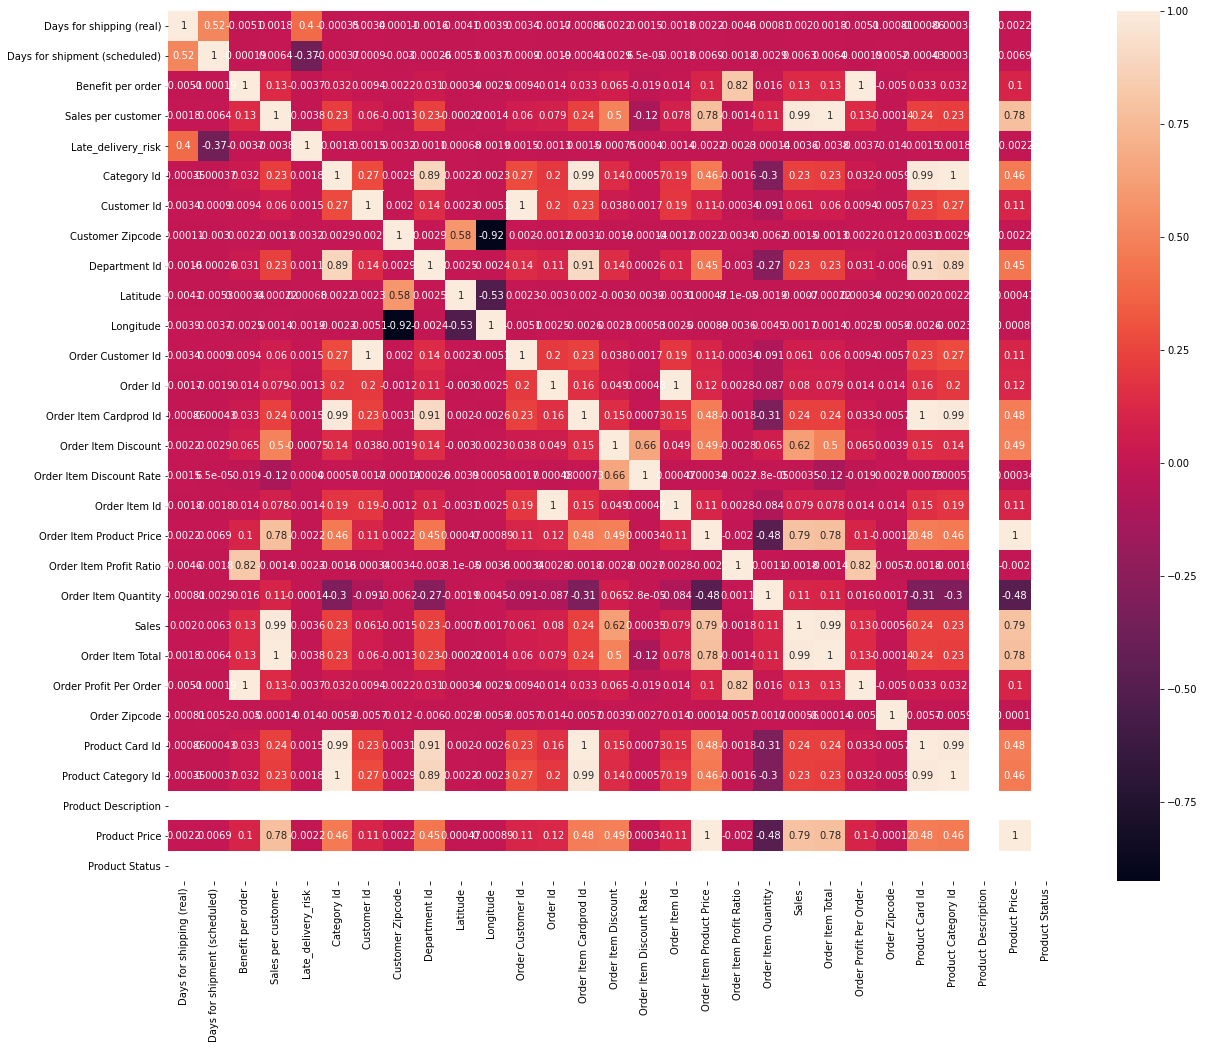

In [11]:
plt.figure(figsize=(20,16))
data = dataset
sns.heatmap(data.corr(), annot=True)

In [13]:
# 查看列空值情况
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


按照不同的market，order region进行聚合求和  

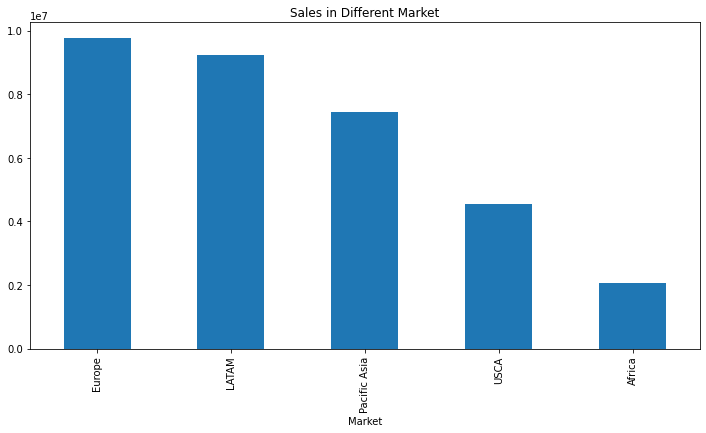

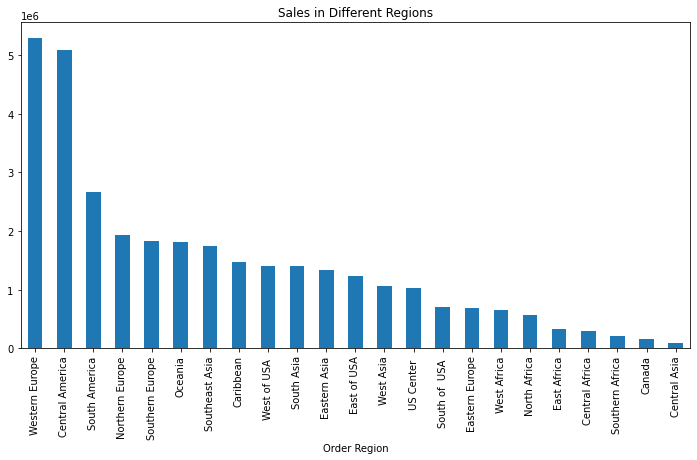

In [16]:
data[['Sales per customer','Market']]
# 基于market进行聚合
market=data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in Different Market')
plt.show()

# 基于region进行聚合
market=data.groupby('Order Region')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in Different Regions')
plt.show()

按照不同的Category name聚合求和和均值 

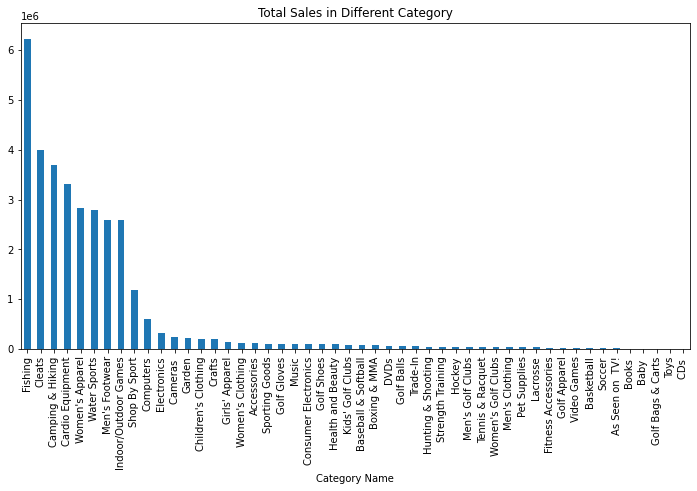

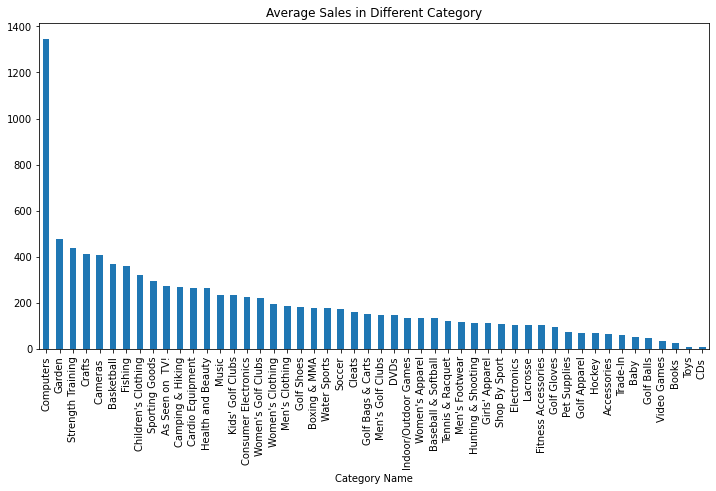

In [18]:
cat=data.groupby('Category Name')
# 不同类别的总销售额
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Total Sales in Different Category')
plt.show()
# 不同类别的平均销售额
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Average Sales in Different Category')
plt.show()

按照不同的时间维度（年月日的趋势）  

In [19]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [21]:
# 取order date 字段中的year， month, weekday, hour
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,2018,1,5,11


查看销售数据的时间规律

<AxesSubplot:title={'center':'Mean Sales in hour'}, xlabel='order_hour'>

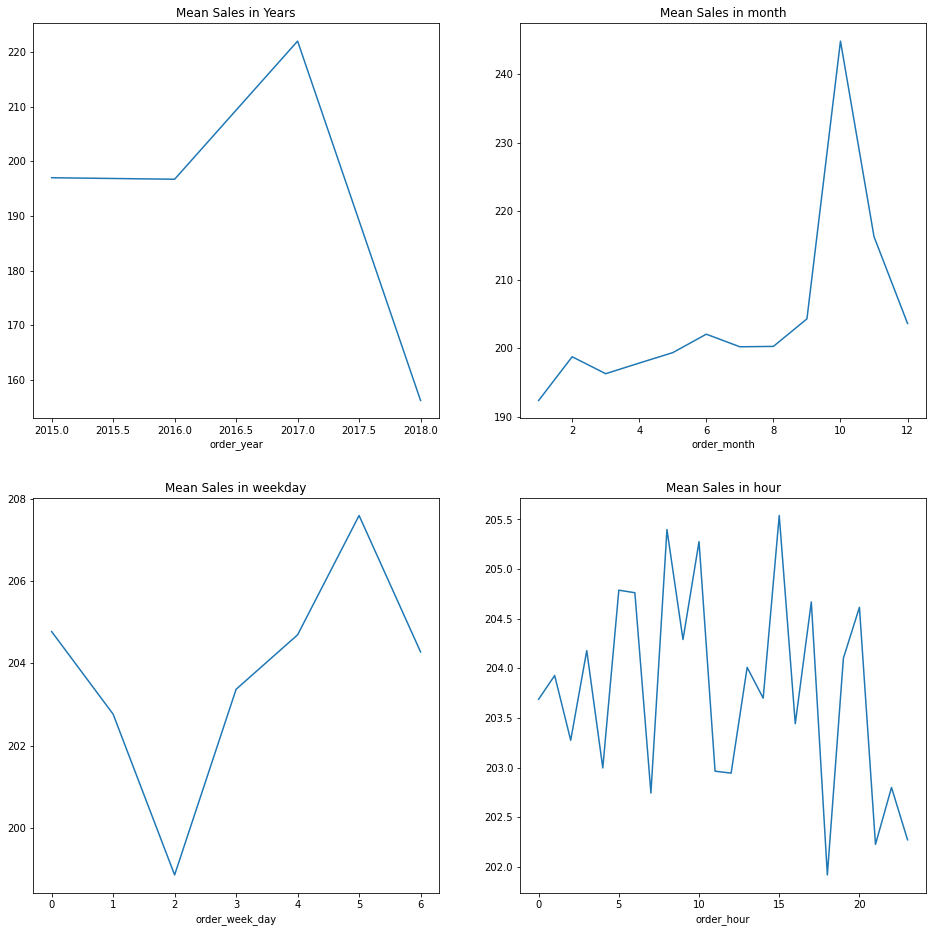

In [22]:
# 对销售额进行探索
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(title='Mean Sales in Years')

plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(title='Mean Sales in month')

plt.subplot(2,2,3)
df_weekday = data.groupby('order_week_day')
df_weekday['Sales'].mean().plot(title='Mean Sales in weekday')

plt.subplot(2,2,4)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(title='Mean Sales in hour')

product price与sales per customer 相关性如何

# 用户分层RFM

In [23]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# 统计最后一笔订单的时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [35]:
# 假设当前时间为2018-2-1
import datetime
now = datetime.datetime(2018,2,1)

# 计算每个用户的RFM指标
customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (now-x.max()).days, 
                                'Order Id':lambda x: len(x), 
                                'Sales':lambda x: x.sum()})

In [36]:
customer_seg.rename(columns={'order date (DateOrders)':'R_value','Order Id':'F_value','Sales':'M_value'}, inplace=True)

In [37]:
# 将RFM数据划分为两个尺度
quantiles = customer_seg.quantile(q=[0.5])
quantiles = quantiles.to_dict()
quantiles

{'R_value': {0.5: 159.0},
 'F_value': {0.5: 7.0},
 'M_value': {0.5: 1499.82503324}}

In [38]:
# R_value越小R_score越大
def R_Score(x, b, c):
    if x < c[b][0.5]:
        return 2
    else:
        return 1
    
# F_value和M_value都是越大对应的score越大
def FM_Score(x, b, c):
    if x >= c[b][0.5]:
        return 2
    else:
        return 1

In [39]:
# 创建R_score，用于将R_value =>[1,2]
customer_seg['R_score'] = customer_seg['R_value'].apply(R_Score, args=('R_value', quantiles))
# 创建F_score，用于将F_value =>[1,2]
customer_seg['F_score'] = customer_seg['F_value'].apply(FM_Score, args=('F_value', quantiles))
# 创建M_score，用于将M_value =>[1,2]
customer_seg['M_score'] = customer_seg['M_value'].apply(FM_Score, args=('M_value', quantiles))

In [40]:
customer_seg

,R_value,F_value,M_value,R_score,F_score,M_score
Customer Id,,,,,,
1,792,1,499.950012,1,1,1
2,136,10,1819.730034,2,2,2
3,229,18,3537.680094,1,2,2
4,380,14,1719.630030,1,2,2
5,457,7,1274.750023,1,2,1
...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1
20754,0,1,215.820007,2,1,1
20755,0,1,327.750000,2,1,1


In [41]:
# 计算RFM用户分层
def RFM_user(df):
    if df['R_score'] == 2 and df['F_score'] == 2 and df['M_score'] == 2:
        return '重要价值用户'
    if df['R_score'] == 2 and df['F_score'] == 1 and df['M_score'] == 2:
        return '重要发展用户'
    if df['R_score'] == 2 and df['F_score'] == 2 and df['M_score'] == 1:
        return '重要保持用户'
    if df['R_score'] == 2 and df['F_score'] == 1 and df['M_score'] == 1:
        return '重要挽留用户'
    
    if df['R_score'] == 1 and df['F_score'] == 2 and df['M_score'] == 2:
        return '一般价值用户'
    if df['R_score'] == 1 and df['F_score'] == 1 and df['M_score'] == 2:
        return '一般发展用户'
    if df['R_score'] == 1 and df['F_score'] == 2 and df['M_score'] == 1:
        return '一般保持用户'
    if df['R_score'] == 1 and df['F_score'] == 1 and df['M_score'] == 1:
        return '一般挽留用户'

In [42]:
customer_seg['Customer_type'] = customer_seg.apply(RFM_user, axis=1)
customer_seg

,R_value,F_value,M_value,R_score,F_score,M_score,Customer_type
Customer Id,,,,,,,
1,792,1,499.950012,1,1,1,一般挽留用户
2,136,10,1819.730034,2,2,2,重要价值用户
3,229,18,3537.680094,1,2,2,一般价值用户
4,380,14,1719.630030,1,2,2,一般价值用户
5,457,7,1274.750023,1,2,1,一般保持用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1,重要挽留用户
20754,0,1,215.820007,2,1,1,重要挽留用户
20755,0,1,327.750000,2,1,1,重要挽留用户
